In [1]:
"""
Analyze daughter particles for annihilation event
author: Jiancheng Zeng
Date: July 12, 2023
"""

'\nAnalyze daughter particles for annihilation event\nauthor: Jiancheng Zeng\nDate: July 12, 2023\n'

In [2]:
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
#from toy_model_analysis import Analyze_trace, read_data_from_toymodel
import toy_model_analysis

Reading data...

<class 'dict'>
Toy Model data imported
Found 6507 Events!
Now processing (6506/6507)
 We got 1282 events selected
Last event is 9997433


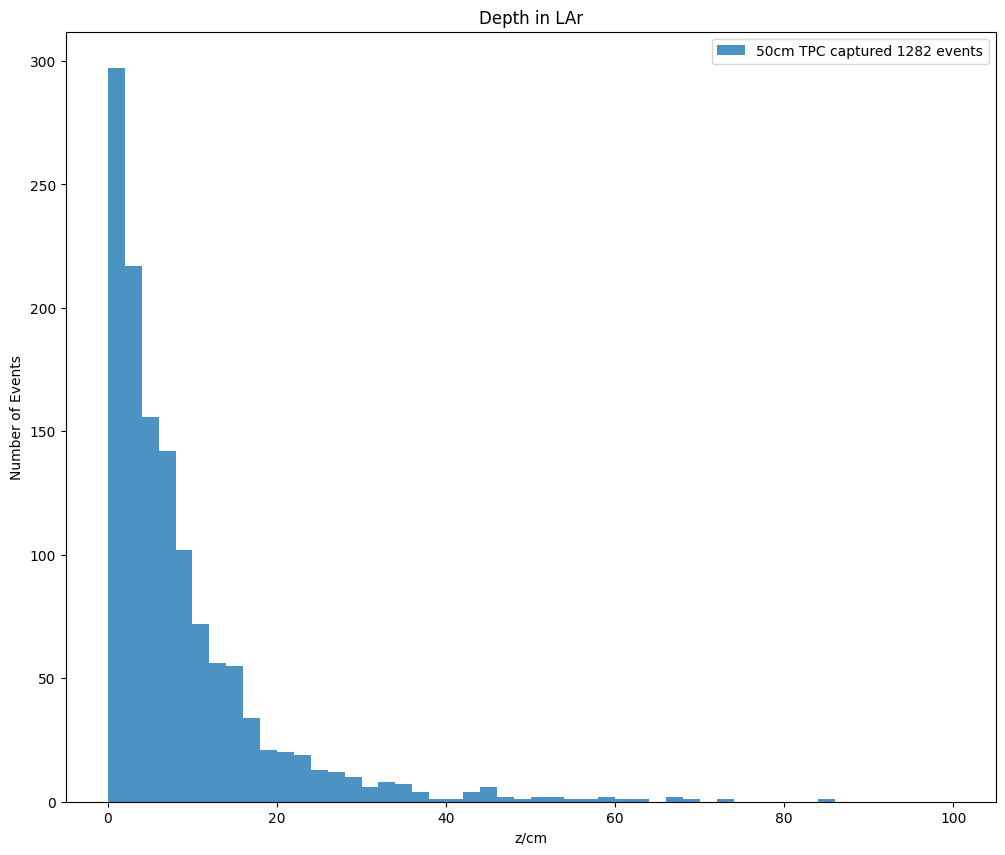

In [4]:
file_path_1 = '/home/jiancheng/GRAMS/toymodel_work/output/2023/GRASP_anti_deuteron_atmo_1e7_50cm_900kgTPC.dat'
label_50cm= '50cm width'

trace_1 = toy_model_analysis.Analyze_trace(toy_model_analysis.read_data_from_toymodel(file_path_1), -1000010020, stop_event=True, in_flight_event=False)

plt.figure(1, figsize=(12, 10))
plt.hist(trace_1[1], bins = 50, alpha = 0.8, label='50cm TPC captured '+ str(len(trace_1[1]))+' events', range=[0, 100])
plt.title("Depth in LAr")
plt.xlabel("z/cm")
plt.ylabel("Number of Events")
plt.legend()